In [67]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import sys

URL = "https://fr.wikipedia.org/wiki/Liste_de_sondages_sur_l'%C3%A9lection_pr%C3%A9sidentielle_fran%C3%A7aise_de_2017#2016"

def loadHTML(URL):
    resultats = requests.get(URL)
    return BeautifulSoup(resultats.text, 'html.parser')
#for annee in range(2012, 2016):
tables = loadHTML(URL).findAll("table")

dfF = pd.DataFrame()

#Pour chaque table de wikipedia :
for table in tables :
    lignes = table.findAll("tr")

    #On récupère le nom de chaque colonne :
    colonnes = []
    for elem in lignes[0].findAll("th"):
        if elem.find("a") is None:
            colonnes.append(elem.text)
        else :
            colonnes.append(elem.find("a").text)
    #On crée un pandas dataframe pour stocker nos table :
    df = pd.DataFrame(columns = colonnes)
    #print(len(colonnes))

    nbRowspan = 0
    rowspan = []
    #our chaque ligne de notre table :

    for i, ligne in enumerate(lignes[2:]):
        line = []
        #lorsque certains éléments de notre tableau occupent plusieurs lignes

        if nbRowspan > 1 :
            for item in rowspan:
                line.append(item)
            nbRowspan-=1
        else :
            rowspan = []

        for elem in ligne.findAll("td"):
            if elem.has_attr("rowspan"):
                nbRowspan = int(elem["rowspan"])
                rowspan.append(elem.text)
            try:
                line.append(float(elem.text.replace("%", "").replace("-", "").replace("–","").replace(",",".")))
            except Exception as e :
                line.append(elem.text.replace("%", "").replace("-", "").replace("–","").replace(",","."))
        if len(line) > len(colonnes) - 3 :
            df.loc[i] = line
        #print(df)

    print("end table")
    try:
        dfF = dfF.append(df)
    except Exception as e:
        print(df["Date"])


#print(dfF)
dfF.to_csv("C:\\Users\\Mohamed\\MS BGD\\fil_rouge_lepoint\\Sondages\BVA\\test.csv")
        #sondeur.append()


test = loadHTML(URL).findAll("table")[1].findAll("tr")[0].findAll("th")[0].text




end table
end table
end table
end table
end table
end table
end table
end table
end table
end table
end table
end table
end table
end table
end table
1     34 septembre 2014
2       1214 avril 2016
3       1517 avril 2016
4         1316 mai 2016
5        1012 juin 2016
6        1417 juin 2016
7    911 septembre 2016
8      25 novembre 2016
9      27 novembre 2016
Name: Date, dtype: object
end table
1    34 septembre 2014
Name: Date, dtype: object
end table
1       1113 avril 2014
2     34 septembre 2014
3     2123 janvier 2015
4     2729 janvier 2015
5       1516 avril 2015
6       2930 avril 2015
7      13 décembre 2015
8     1415 janvier 2016
9       1415 avril 2016
10      1214 avril 2016
Name: Date, dtype: object
end table
1    2123 janvier 2015
2    2729 janvier 2015
3      2930 avril 2015
Name: Date, dtype: object
end table
1    1415 janvier 2016
2      1415 avril 2016
Name: Date, dtype: object
end table
1    1415 janvier 2016
Name: Date, dtype: object
end table
1      34 septemb

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Mohamed\\MS BGD\\fil_rouge_lepoint\\Sondages\\BVA\\test.csv'

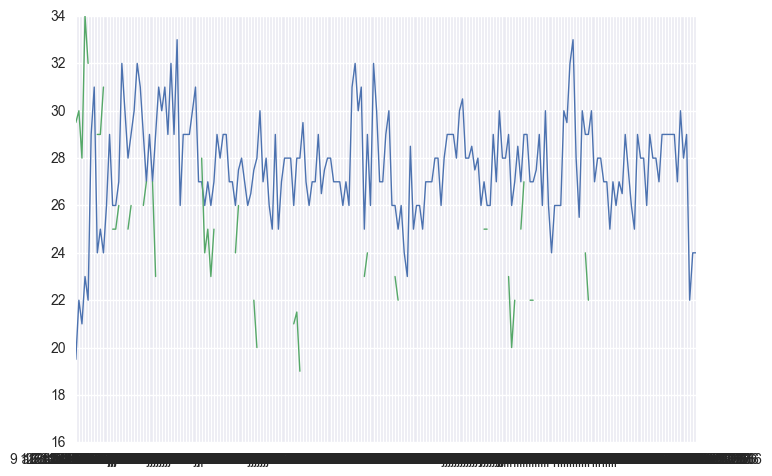

In [74]:
#print(test)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1)

notCandidats = ["Date", "Sondeur", "Échantillon"]

for col in dfF.columns:
    if col not in notCandidats: 
        dfF[col] = dfF[col].map(lambda x: x if isinstance(x, float) else np.nan)
    
x = range(len(dfF["Date"]))
plt.xticks(x, dfF["Date"])
#plt.plot(x,dfF["Nicolas Sarkozy"])
plt.plot(x,dfF["Marine Le Pen"], lw = 1)
plt.plot(x,dfF["Nicolas Sarkozy"], '-', lw=1)


plt.show()